<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>
<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">مقدمه ای بر شبکه‌های عصبی کانولوشنالی<br>Convolutionl Neural Networks - CNN</div></center></h1>

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مقدمه ای بر شبکه‌های عصبی کانولوشنالی(Convolutionl Neural Networks - CNN)</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در ابتدا معماری شبکه را مشخص میکنیم.
<br>
به لایه های conv و pool دقت کنید.
<br>
قبل از اولین لایه Dense یا Fully Connected همیشه متد Flatten فراخوانی میشود تا نورون ها به صورت یک وکتور در بیایند.
</div>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">اجرا روی Colab</div>


<div style="direction:rtl;text-align:right;font-family:Tahoma">
اگر روی گوگل کولب اجرا میکنید این خطوط را از حالت کامنت خارج نمائید.
</div>

In [ ]:
#!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
#!mkdir dataset
#!wget https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat -P dataset

In [2]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
#from dataset import load_hoda
import matplotlib.pyplot as plt

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


<div style="direction:rtl;text-align:right;font-family:Tahoma">
نگاهی به تنسور وردی و خروجی هر لایه بیندازیم.
<br>
تصویر ورودی 28x28x3 بوده است
</div>

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">کد یک شبکه کانولوشنالی و آموزش آن از ابتدا تا انتها بر روی مجموعه داده هدی</div>


<div style="direction:rtl;text-align:right;font-family:Tahoma">
تصاویر مجموعه داده هدی در تابعی که قبلا نوشته ایم، load_hoda به صورت flat شده و یک وکتور در آمده اند.
<br>
در این فراخوانی طول و عرض تصاویر 28 قرار داده شده است، پس خروجی این تابع وکتورهای 784تایی است.
<br>
** دقت کنید که قبل از ورودی شبکه کانولوشنالی تصویر را به شکل اصلی خود یعنی 28x28 برگردانده ایم.**
<br>
همچنین چون تصاویر سیاه و سفید است تعداد کانال تصویر را 1 قرار داده ایم.
</div>

In [4]:
from scipy import io
import matplotlib.pyplot as plt
from skimage.transform import resize
#from sklearn.neighbors import KNeighborsClassifier
import cv2

In [5]:
#load dataset
dataset = io.loadmat('./dataset/Data_hoda_full.mat')

In [6]:
#test and training set
x_train_original = np.squeeze(dataset['Data'][:3500])
y_train_original = np.squeeze(dataset['labels'][:3500])
x_test_original = np.squeeze(dataset['Data'][3500:3900])
y_test_original = np.squeeze(dataset['labels'][3500:3900])

In [7]:
X_train_5by5 = [cv2.resize(img, dsize= (28, 28)) for img in x_train_original]
X_test_5by_5 = [cv2.resize(img, dsize= (28, 28)) for img in x_test_original]

In [8]:
x_train_original = [x.reshape(784) for x in X_train_5by5]
x_test_original = [x.reshape(784) for x in X_test_5by_5]

In [9]:
# 1. Import libraries and modules
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
#from dataset import load_hoda
import matplotlib.pyplot as plt

np.random.seed(123)  # for reproducibility

# Load pre-shuffled HODA data into train and test sets
#x_train_original, y_train_original, x_test_original, y_test_original = load_hoda(
#                                                                        training_sample_size=3500,
#                                                                        test_sample_size=400,size=28)

# Preprocess input data
''' 3.1: input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)


# test and validation set
x_val = x_test[:200]
x_test = x_test[200:]
y_val = y_test[:200]
y_test = y_test[200:]

# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# 7. Fit model on training data
history = model.fit(x_train, y_train,
          epochs=60, batch_size=256, validation_data = (x_val, y_val))



Epoch 1/60
14/14 [==============================] - 5s 175ms/step - loss: 2.0061 - accuracy: 0.3334 - val_loss: 1.2361 - val_accuracy: 0.7650
Epoch 2/60
14/14 [==============================] - 2s 142ms/step - loss: 1.0738 - accuracy: 0.6417 - val_loss: 0.5053 - val_accuracy: 0.8350
Epoch 3/60
14/14 [==============================] - 2s 136ms/step - loss: 0.7386 - accuracy: 0.7477 - val_loss: 0.3562 - val_accuracy: 0.8950
Epoch 4/60
14/14 [==============================] - 2s 136ms/step - loss: 0.5592 - accuracy: 0.8094 - val_loss: 0.2696 - val_accuracy: 0.9200
Epoch 5/60
14/14 [==============================] - 2s 148ms/step - loss: 0.4587 - accuracy: 0.8423 - val_loss: 0.2407 - val_accuracy: 0.9250
Epoch 6/60
14/14 [==============================] - 2s 151ms/step - loss: 0.3975 - accuracy: 0.8703 - val_loss: 0.2237 - val_accuracy: 0.9300
Epoch 7/60
14/14 [==============================] - 2s 148ms/step - loss: 0.3383 - accuracy: 0.8806 - val_loss: 0.1924 - val_accuracy: 0.9350
Epoch 

14/14 [==============================] - 2s 144ms/step - loss: 0.0260 - accuracy: 0.9906 - val_loss: 0.1211 - val_accuracy: 0.9700
Epoch 59/60
14/14 [==============================] - 2s 150ms/step - loss: 0.0275 - accuracy: 0.9914 - val_loss: 0.1183 - val_accuracy: 0.9750
Epoch 60/60
14/14 [==============================] - 2s 144ms/step - loss: 0.0300 - accuracy: 0.9903 - val_loss: 0.1464 - val_accuracy: 0.9750


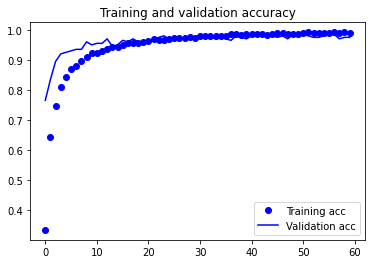

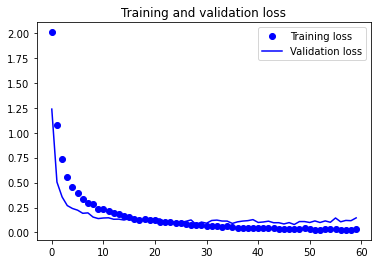

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
image = plt.imread('./image/adad_1.png')

In [20]:
image = image[:,:,0] / 3 + image[:,:,1] / 3 + image[:,:,2] / 3

In [21]:
#image = image * 255

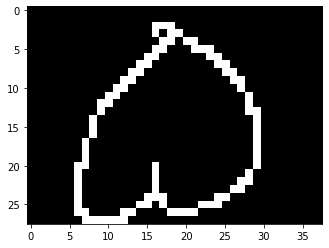

In [22]:
plt.imshow(image,cmap = 'gray')

In [23]:
image = image.astype('float32')

In [24]:
image  = cv2.resize(image, dsize = (28,28))

In [25]:
fimage = image.reshape([-1,28,28,1])

In [26]:
model.predict(fimage)

1/1 [==============================] - 0s 19ms/step


array([[2.4812516e-09, 8.8637986e-09, 1.4013918e-10, 7.1621880e-06,
        2.8743837e-06, 9.9998081e-01, 7.2919826e-09, 4.1934762e-09,
        9.1445081e-06, 6.6958431e-12]], dtype=float32)